In [ ]:
!pip install MedShapeNetCore

Check the general information about MedShapeNetCore:

In [4]:
!python -m MedShapeNetCore info

______copyright
MedShapeNetCore v0.1.0
Homepage: https://github.com/Jianningli/medshapenet-feedback/
Contact: Jianning Li, jianningli.me@gmail.com
______available datasets
ASOCA:     {'url': 'https://zenodo.org/records/10423181/files/medshapenetcore_ASOCA.npz?download=1', 'size': '41.8Mb', 'link': 'https://asoca.grand-challenge.org/', 'information': 'coronary arteries', 'avi_keys': ['mask', 'point', 'mesh->vertices->sample index', 'mesh->faces->sample index', 'label']}      
___
FLARE:     {'url': 'https://zenodo.org/records/10423181/files/medshapenetcore_FLARE.npz?download=1', 'size': '555Mb', 'link': 'https://flare.grand-challenge.org/', 'information': 'abdominal organs', 'avi_keys': ['organ->mask', 'orgna->point', 'organ->mesh->vertices->sample index', 'organ->mesh->faces->sample index']}      
___
KITS:      {'url': 'https://zenodo.org/records/10423181/files/medshapenetcore_KITS.npz?download=1', 'size': '401Mb', 'link': 'https://kits-challenge.org/kits23/', 'information': 'kidney a

Download a dataset 'ASOCA':

In [5]:
!python -m MedShapeNetCore download ASOCA

downloading...
[################################] 42842/42842 - 00:00:12
download complete...
file directory: ./medshapenetcore_npz/medshapenetcore_ASOCA.npz


Check the available keys of the dataset 'ASOCA':  

In [6]:
!python -m MedShapeNetCore check_available_keys ASOCA

___size___
mask: Mx(LxWxH) 
point: MxNx3  
mesh->vertices->sample index:  Nvx3  
mesh->faces->sample index:  Nfx3  
label:Mx1, heathy (0), pathological (1) 
label->mask:Mx(LxWxH) 
___notation___
M:  the  number of samples
sample index: integer from 0 to M  
N:  the number of points 
N:  the number of points 
Nv: the number of vertices of the sample  
Nf: the number of faces of the sample 

___AvailableKeys___
['mask', 'point', 'mesh->vertices->sample index', 'mesh->faces->sample index', 'label']


Import and initialize the classes for the processing of the dataset 'ASOCA':

In [7]:
from MedShapeNetCore.MedShapeNetCore import MyDict,MSNLoader,MSNVisualizer,MSNSaver,MSNTransformer
msn_loader=MSNLoader()
msn_vis=MSNVisualizer()
msn_saver=MSNSaver()
msn_transformer=MSNTransformer()

Load the dataset:

In [9]:
asoca_data=msn_loader.load('ASOCA')

current dataset: ./medshapenetcore_npz/medshapenetcore_ASOCA.npz
available keys in the dataset: ['mask', 'point', 'mesh', 'labels']


Access the volume, point, and mesh data through available keys, and visualize them:

In [12]:
volume=asoca_data['mask']
points=asoca_data['point']
mesh_vertice=asoca_data['mesh']['vertices']
mesh_face=asoca_data['mesh']['faces']
print(volume.shape)
print(points.shape)
print(mesh_vertice.shape)
print(mesh_face.shape)
print(mesh_vertice[0].shape)  # choose the first sample
print(mesh_face[0].shape)     # choose the first sample

(40, 256, 256, 256)
(40, 65536, 3)
(40,)
(40,)
(14553, 3)
(46224, 3)


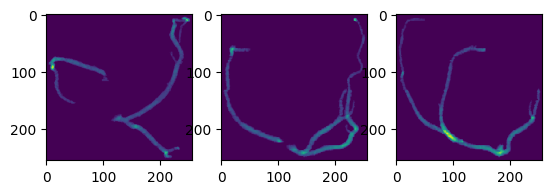

In [14]:
msn_vis.plot_mask_projection(volume[0]) # visualize the projection of the first sample in axial, sagittal and coronal plane

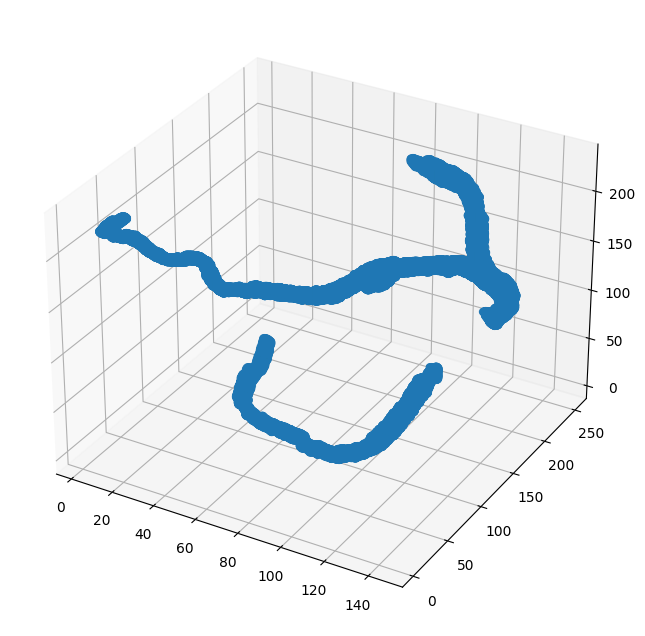

In [15]:
msn_vis.plot_point(points[0][:,0],points[0][:,1],points[0][:,2]) # visualize the first point cloud

In [17]:
msn_vis.plot_mesh(mesh_vertice[0],mesh_face[0]) # visualize the first mesh

Downsample the mask and decimate the mesh:

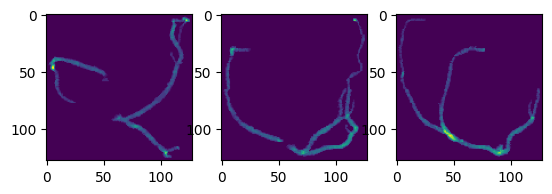

original num vertices 14553
original num faces 46224
final num vertices 33640
final num faces 19997


<trimesh.Trimesh(vertices.shape=(10187, 3), faces.shape=(20368, 3))>

In [22]:
downsampled_mask=msn_transformer.mask_downsampling(volume[0],[128,128,128]) # downsample the first volume from (256,256,256) to (128,128,128)
msn_saver.save_nifti(downsampled_mask,'downsampled.nii.gz')  # save the downsampled mask
msn_vis.plot_mask_projection(downsampled_mask)  # visualize the downsampled mask
decimatedmesh, new_verts, new_faces=msn_transformer.mesh_decimation(mesh_vertice[0],mesh_face[0],target_num_faces=20000)  # decimate the first mesh to 20000 triangules
msn_saver.save_stl(new_verts,new_faces,'decimated.stl') # save the decimated mesh to stl

Delete all data generated:

In [23]:
!python -m MedShapeNetCore clean

deleting all files generated by MedShapeNet...
